In [1]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials
from azure.ai.vision.imageanalysis import ImageAnalysisClient
from azure.ai.vision.imageanalysis.models import VisualFeatures
from azure.core.credentials import AzureKeyCredential
import matplotlib.pyplot as plt
from array import array
import os
from PIL import Image, ImageDraw
import sys
import time
import os


'''
Authenticate
Authenticates your credentials and creates a client.
'''
subscription_key = os.environ["VISION_KEY"]
endpoint = os.environ["VISION_ENDPOINT"]
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))
'''
END - Authenticate
'''

'\nEND - Authenticate\n'


Text:
Pentru linii ((80, 304), (1342, 304), (1343, 453), (80, 464))
Pentru linii ((128, 594), (1042, 583), (1043, 712), (128, 723))
Pentru linii ((78, 912), (1016, 912), (1015, 1037), (76, 1020))
Pentru linii ((105, 1130), (1455, 1156), (1454, 1291), (102, 1260))
Succes in rezolvarea TEMELOR la LABORA toarele de Inteligentà Artificialà! 


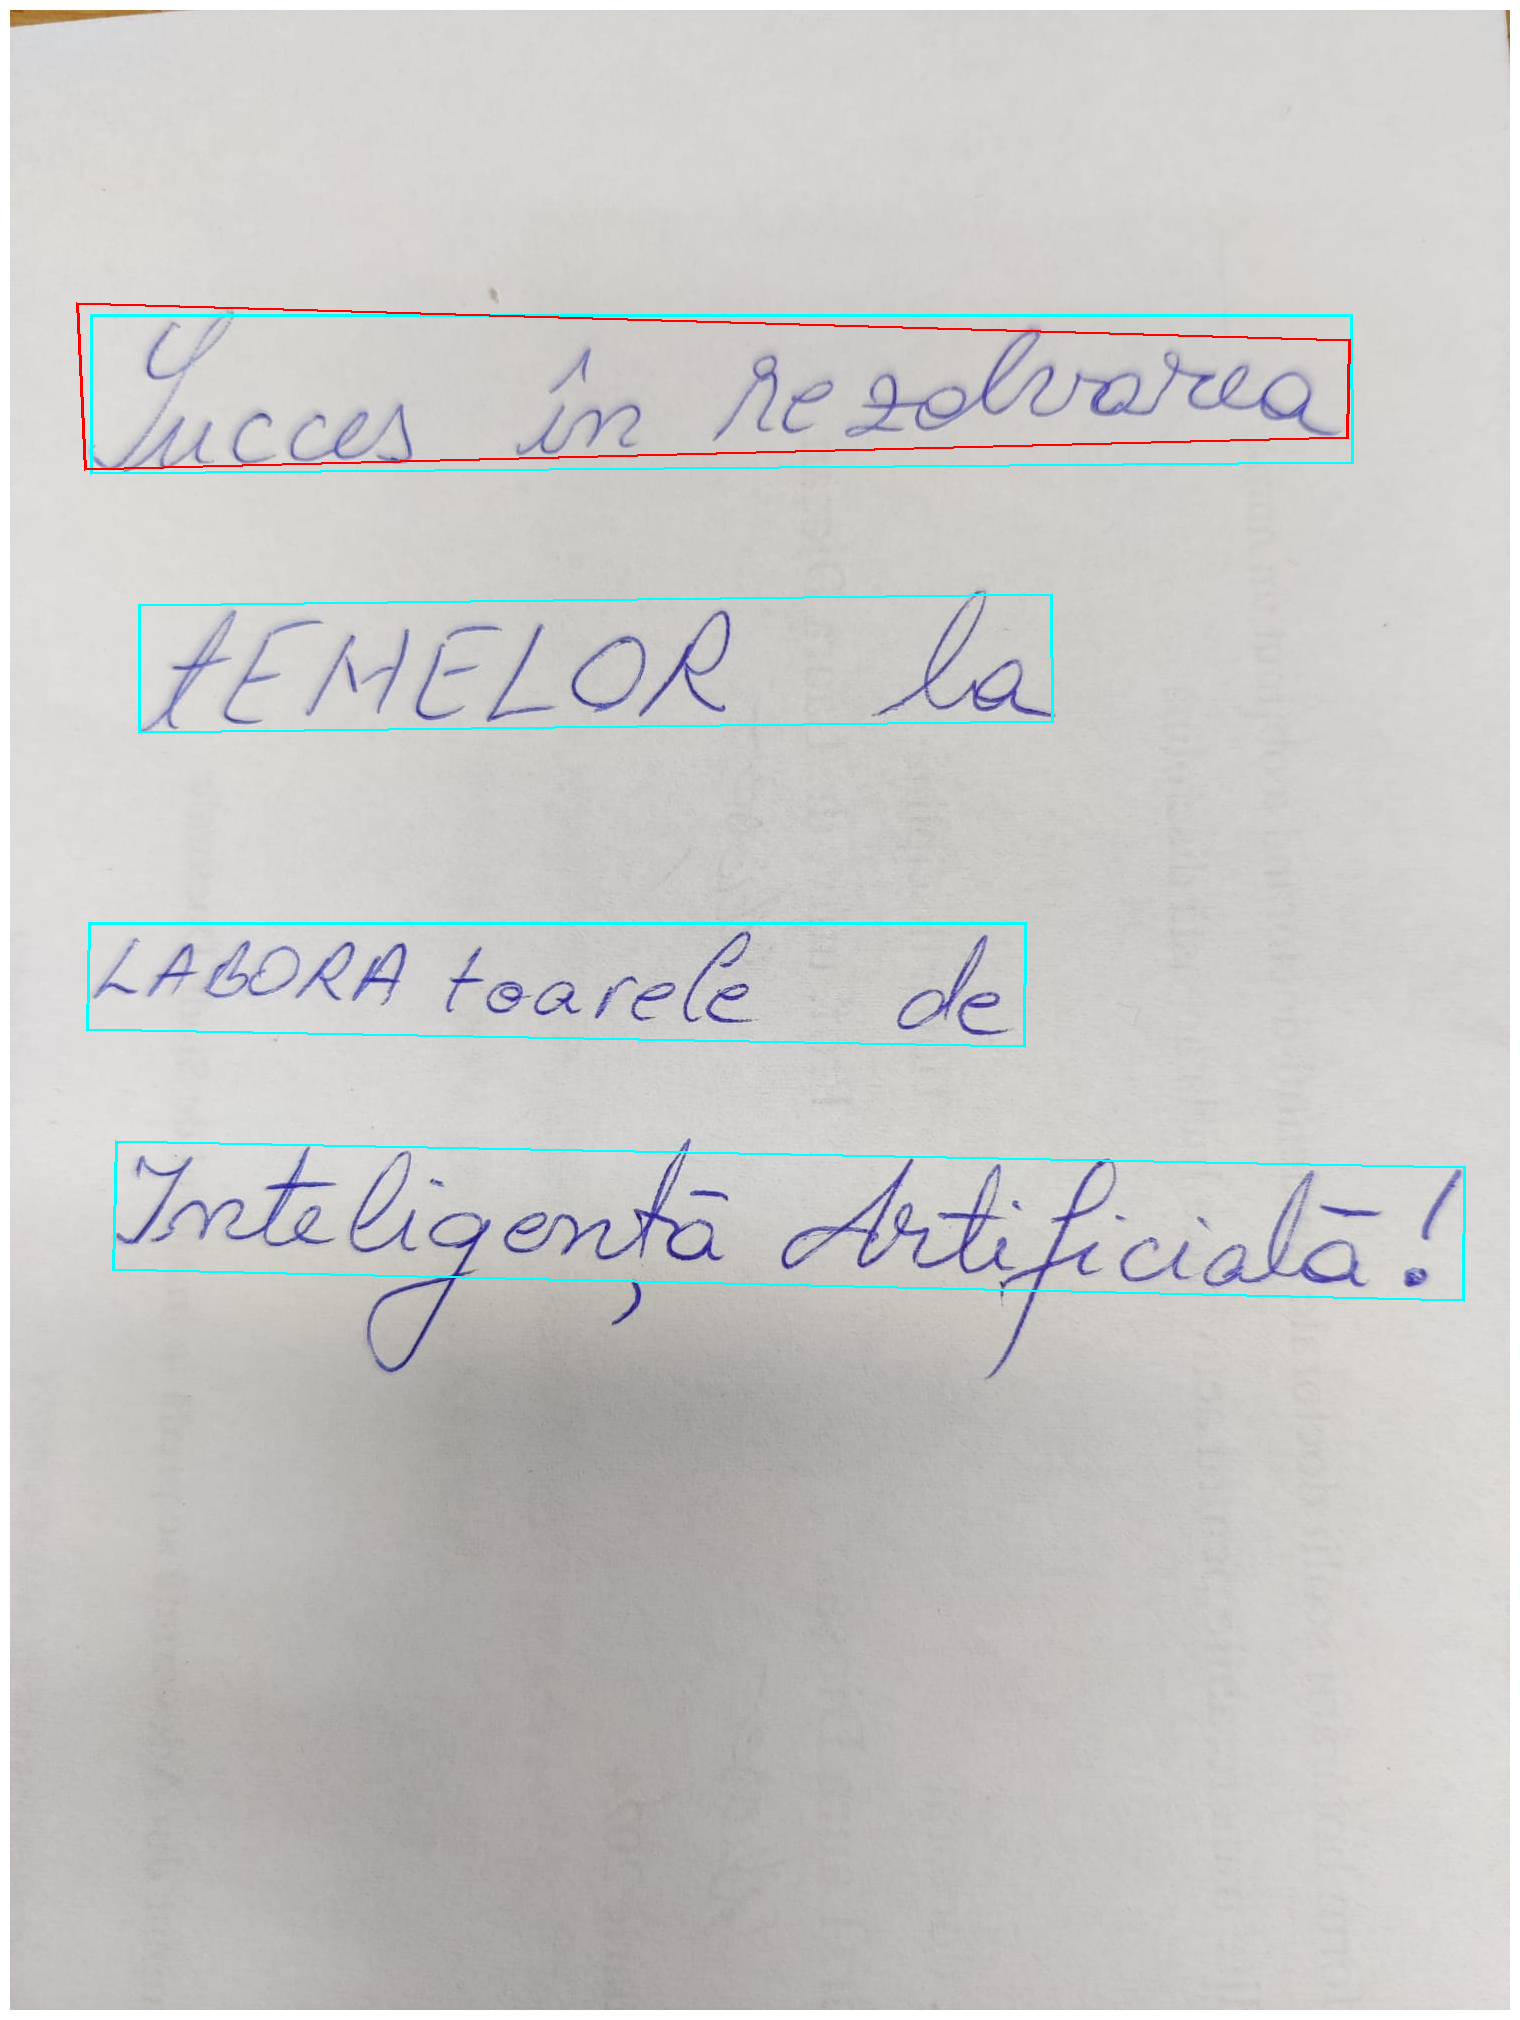

In [16]:
 # Authenticate Azure AI Vision client
 cv_client = ImageAnalysisClient(
     endpoint=endpoint,
     credential=AzureKeyCredential(subscription_key)
 )

with open("D:/FACULTATE/SEM4/AI/Lab3/test2.jpeg", "rb") as image_file:
    image_data = image_file.read()

result = cv_client.analyze(
     image_data=image_data,
     visual_features=[VisualFeatures.READ]
 )

resultRead = ""
if result.read is not None:
     print("\nText:")

     # Prepare image for drawing
     image = Image.open("D:/FACULTATE/SEM4/AI/Lab3/test2.jpeg")
     fig = plt.figure(figsize=(image.width/100, image.height/100))
     plt.axis('off')
     draw = ImageDraw.Draw(image)
     color = 'cyan'

     for line in result.read.blocks[0].lines:
         # Return the text detected in the image
         #print(f"  {line.text}")    
         resultRead += str(line.text)+" "
         drawLinePolygon = True
            
         r = line.bounding_polygon
         bounding_polygon = ((r[0].x, r[0].y),(r[1].x, r[1].y),(r[2].x, r[2].y),(r[3].x, r[3].y))
         print("Pentru linii", bounding_polygon)
         draw.polygon(bounding_polygon, outline=color, width=3)
         ground_Truth = ((74, 460),(66, 292),(1340, 329),(1338, 428))
         draw.polygon(ground_Truth, outline="red", width=3)
         # Return the position bounding box around each line
            
            # Return each word detected in the image and the position bounding box around each word with the confidence level of each word
         for word in line.words:
             #print(f"    {word.text}")
            # Draw word bounding box
             wr = word.bounding_polygon  
             word_bounding_box  = ((wr[0].x, wr[0].y), (wr[1].x, wr[1].y), (wr[2].x, wr[2].y), (wr[3].x, wr[3].y))
             
             #draw.polygon(word_bounding_box, outline="red", width=1)
         # Return each word detected in the image and the position bounding box around each word with the confidence level of each word

    
     # Save image
     plt.imshow(image)
     plt.tight_layout(pad=0)
     outputfile = 'test2.jpeg'
     # fig.savefig(outputfile)
     # print('\n  Results saved in', outputfile)
     print(resultRead)